In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import integrate
from scipy.stats import norm
from scipy.special import logsumexp

# Set some defaults
sns.set_theme(context="paper", font_scale=1.2)
sns.set_style("ticks")

plt.rc("axes.spines", top=False, right=False)

%config InlineBackend.figure_format = "retina"

In [2]:
def state_ege(previous_state, ege, T, B, A=0):
    state_est = A * previous_state + B * (T - ege)
    return state_est

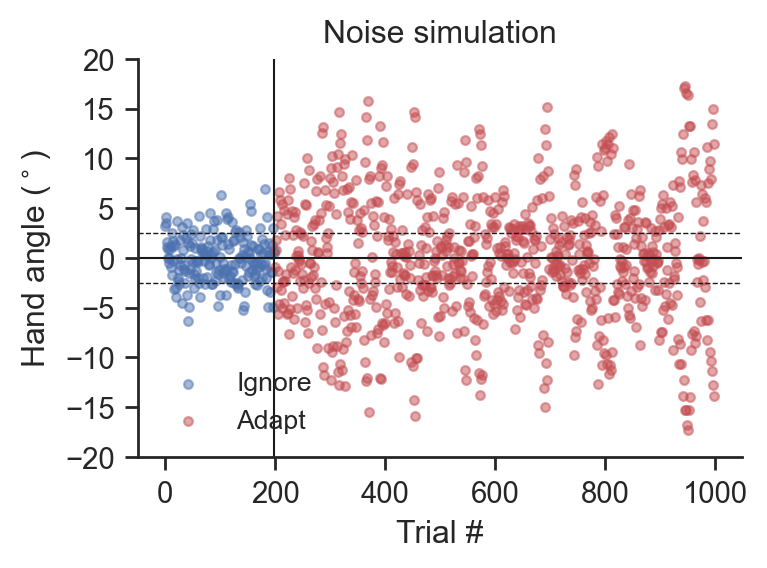

In [44]:
num_trials = 1000
x = np.zeros(num_trials)
sigma_motor = 2.5
A = 0.0
B = 0.92
baseline_end = 199

for i in range(num_trials):
    if i <= baseline_end:
        x[i] = np.random.normal(0, sigma_motor)
    else:
        e = x[i - 1]
        x[i] = state_ege(x[i - 1], e, 0, B, A) + np.random.normal(0, sigma_motor)

fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(range(baseline_end + 1), x[0:baseline_end + 1], alpha=0.5, s=10, 
           c="b", label="Ignore")
ax.scatter(range(baseline_end + 1, num_trials), x[baseline_end + 1:], alpha=0.5, 
           s=10, c="r", label="Adapt")
ax.axvline(baseline_end, c="k", linewidth=0.75)
ax.axhline(sigma_motor, c="k", linestyle="--", linewidth=0.5)
ax.axhline(0, c="k", linewidth=0.75)
ax.axhline(-sigma_motor, c="k", linestyle="--", linewidth=0.5)
ax.set(xlabel="Trial #", ylabel="Hand angle ($^\circ$)", yticks=np.arange(-20, 20.1, 5),
      title="Noise simulation")
ax.legend(frameon=False, fontsize="small", loc="lower left")
plt.tight_layout()

fig.savefig("images/adapt-to-noise.png", dpi=300)